In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from scipy.sparse.linalg import spsolve
from scipy.sparse import csr_matrix
import time
from matplotlib.animation import FuncAnimation

In [3]:
try_number = 0

In [27]:
T = 0.1
field_size = 200
time_duration = 100

t = T / time_duration
h = 1 / field_size
u = np.zeros((field_size, field_size, int(T / t)))


def phi(x, y):
    return np.sin(x ** 2 + y)


def g(x, y, t):
    return np.sin(x + y ** 2)

In [28]:
def generate_A(n, h, t):
    A = np.eye((n * n), dtype='float')
    for i in range(1, n - 1):
        for j in range(1, n - 1):
            row = n * j + i
            A[row][n * j + i] = h ** 2 + 4 * t
            A[row][n * j + (i - 1)] = -t
            A[row][n * j + (i + 1)] = -t
            A[row][n * (j - 1) + i] = -t
            A[row][n * (j + 1) + i] = -t
    return A
            

def generate_b(u, n, h, t, k):
    b = np.zeros((n, n))
    
    boundary_mask = np.zeros((n, n), dtype=bool)
    boundary_mask[0, :] = boundary_mask[-1, :] = True
    boundary_mask[:, 0] = boundary_mask[:, -1] = True
    
    inner_mask = ~boundary_mask
    i, j = np.where(boundary_mask)
    b[boundary_mask] = g(i * h, j * h, k * t)
    
    b[inner_mask] = h ** 2 * u[inner_mask][:, k]
    b = b.ravel()
    
    return b

In [29]:
def Solution():
    for i in range(field_size):
        for j in range(field_size):
            if i == 0 or j == 0 or i == field_size - 1 or j == field_size - 1:
                u[i][j][0] = g(i * h, j * h, 0)
            else:
                u[i][j][0] = phi(i * h, j * h)
    
    A = csr_matrix(generate_A(field_size, h, t))
    for k in range(1, time_duration):
        b = generate_b(u, field_size, h, t, k - 1)
        y = spsolve(A, b)
        u[:, :, k] = y.reshape(field_size, field_size)

In [30]:
Solution()

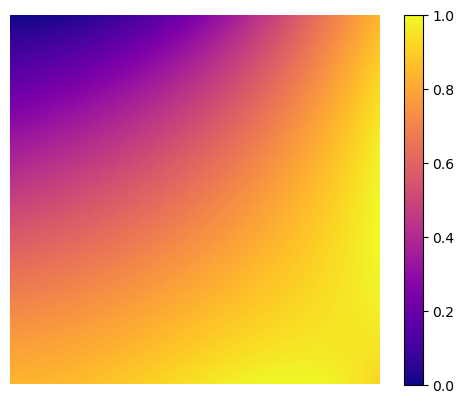

In [31]:
fig, ax = plt.subplots()
frames = time_duration - 3
interval = 100
heatmap = ax.imshow(u[:, :, 0], cmap='plasma', interpolation='nearest', vmin = 0, vmax = 1)

k = 0

def update(frame):
    global k
    heatmap.set_array(u[:, :, k])
    k += 1
    return [heatmap]

plt.colorbar(heatmap)
plt.axis('off')
ani = FuncAnimation(fig, update, frames=frames, interval=interval, blit=True)
ani.save(f'trys/animation{try_number}.gif', writer=PillowWriter(fps=10))